In [1]:
%%javascript
$.getScript('http://asimjalis.github.io/ipyn-ext/js/ipyn-present.js')

<IPython.core.display.Javascript object>

<img src="images/spark-logo.png">

<h1 class="tocheading">Spark SQL</h1>
<div id="toc"></div>

Spark SQL
=========

Spark SQL
---------

What is Spark SQL?

- Spark SQL takes basic RDDs and puts a schema on them.

What are schemas?

- Schema = Table Names + Column Names + Column Types

What are the pros of schemas?

- Schemas enable using column names instead of column positions

- Schemas enable queries using SQL and DataFrame syntax

- Schemas make your data more structured.

Pop Quiz
--------

<details><summary>
What are the cons of schemas?
</summary>
1. Schemas make your data more structured.
<br>
2. They make things more fragile.
<br>
3. Y2K was a schema-problem.
</details>


Start Spark SQL
---------------

How can I start using Spark SQL?

- Create a SparkContext.

In [1]:
import pyspark
sc = pyspark.SparkContext()
print sc

/Users/isaac/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


- Create a HiveContext.

In [2]:
sqlContext = pyspark.HiveContext(sc)
print sqlContext

- Instead of a HiveContext you can initialize `sqlContext` using
  `pyspark.SqlContext(sc)`

- However, this is less preferred.

What is the difference between SparkContext and HiveContext?

- HiveContext gives you access to the metadata stored in Hive.

- This enables Spark SQL to interact with tables created in Hive.

- Hive tables can be backed by HDFS files, S3, HBase, and other data
  sources.

DataFrame, Schema, SchemaRDD
----------------------------

What is a DataFrame?

- DataFrames are the primary abstraction in Spark SQL.

- Think of a DataFrames as RDDs with schema. 

What is a schema?

- Schemas are metadata about your data.

- Schemas define table names, column names, and column types over your
  data.

- Schemas enable using SQL and DataFrame syntax to query your RDDs,
  instead of using column positions.

What is a SchemaRDD?

- Spark 1.3 introduced the concept of a DataFrame as the primary SQL
  abstraction.

- Before Spark 1.3 DataFrames were called SchemaRDD.

- Some of the DataFrame syntax will require using Spark 1.3 or later.

- Watch out for syntax changes.

- We will use the term DataFrame to refer to both SchemaRDDs and
  DataFrames.

Spark SQL Using CSV
-------------------

How can I pull in my CSV data and use Spark SQL on it?

- Make sure the CSV exists.

In [3]:
%%writefile sales.csv
#ID,Date,Store,State,Product,Amount
101,11/13/2014,100,WA,331,300.00
104,11/18/2014,700,OR,329,450.00
102,11/15/2014,203,CA,321,200.00
106,11/19/2014,202,CA,331,330.00
103,11/17/2014,101,WA,373,750.00
105,11/19/2014,202,CA,321,200.00

Overwriting sales.csv


- Read the file and convert columns to right types.

In [4]:
rdd = sc.textFile('sales.csv')\
    .filter(lambda line: not line.startswith('#'))\
    .map(lambda line: line.split(','))\
    .map(lambda \
      (id,date,store,state,product,amount):\
      (int(id),date,int(store),state,int(product),float(amount)))
rdd.collect()

[(101, u'11/13/2014', 100, u'WA', 331, 300.0),
 (104, u'11/18/2014', 700, u'OR', 329, 450.0),
 (102, u'11/15/2014', 203, u'CA', 321, 200.0),
 (106, u'11/19/2014', 202, u'CA', 331, 330.0),
 (103, u'11/17/2014', 101, u'WA', 373, 750.0),
 (105, u'11/19/2014', 202, u'CA', 321, 200.0)]

- Import data types.

In [5]:
from pyspark.sql.types import *

In [ ]:
pyspark.sql.types.

- Define a schema.

In [21]:
schema = StructType( [
    StructField('id',IntegerType(),True),
    StructField('date',StringType(),True),
    StructField('store',IntegerType(),True),
    StructField('state',StringType(),True),
    StructField('product',IntegerType(),True),
    StructField('amount',FloatType(),True)] )

- Define the DataFrame object. Note: This will only work with Spark
  1.3 or later.

In [22]:
df = sqlContext.createDataFrame(rdd,schema)
df.show()

+---+----------+-----+-----+-------+------+
| id|      date|store|state|product|amount|
+---+----------+-----+-----+-------+------+
|101|11/13/2014|  100|   WA|    331| 300.0|
|104|11/18/2014|  700|   OR|    329| 450.0|
|102|11/15/2014|  203|   CA|    321| 200.0|
|106|11/19/2014|  202|   CA|    331| 330.0|
|103|11/17/2014|  101|   WA|    373| 750.0|
|105|11/19/2014|  202|   CA|    321| 200.0|
+---+----------+-----+-----+-------+------+



- If your version of Spark is earlier than 1.3 use the following
  syntax instead.

In [23]:
df = sqlContext.applySchema(rdd, schema)
df.show()

+---+----------+-----+-----+-------+------+
| id|      date|store|state|product|amount|
+---+----------+-----+-----+-------+------+
|101|11/13/2014|  100|   WA|    331| 300.0|
|104|11/18/2014|  700|   OR|    329| 450.0|
|102|11/15/2014|  203|   CA|    321| 200.0|
|106|11/19/2014|  202|   CA|    331| 330.0|
|103|11/17/2014|  101|   WA|    373| 750.0|
|105|11/19/2014|  202|   CA|    321| 200.0|
+---+----------+-----+-----+-------+------+



/usr/local/spark/python/pyspark/sql/context.py:298: UserWarning: applySchema is deprecated, please use createDataFrame instead
  warnings.warn("applySchema is deprecated, please use createDataFrame instead")


- The older syntax will work in Spark 1.3 and later as well, but it
  will give you deprecation warnings.

Pop Quiz
--------

<details><summary>
What change do we have to make to the code above if we are
processing a TSV file instead of a CSV file?
</summary>
<br>
Replace `line.split(',')` with `line.split()`
</details>

Using SQL With DataFrames
-------------------------

How can I run SQL queries on DataFrames?

- Register the table with SqlContext.

In [24]:
df

DataFrame[id: int, date: string, store: int, state: string, product: int, amount: float]

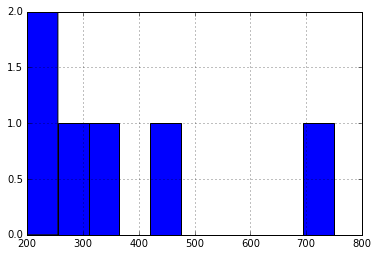

In [27]:
df.toPandas().amount.hist()

In [28]:
df.registerTempTable('sales')

- Run queries on the registered tables.

In [29]:
result = sqlContext.sql(
    'SELECT state,amount from sales where amount > 100')

- View the results using `show()` or `collect()`.

In [32]:
result.show()
result.collect()

+-----+------+
|state|amount|
+-----+------+
|   WA| 300.0|
|   OR| 450.0|
|   CA| 200.0|
|   CA| 330.0|
|   WA| 750.0|
|   CA| 200.0|
+-----+------+



[Row(state=u'WA', amount=300.0),
 Row(state=u'OR', amount=450.0),
 Row(state=u'CA', amount=200.0),
 Row(state=u'CA', amount=330.0),
 Row(state=u'WA', amount=750.0),
 Row(state=u'CA', amount=200.0)]

Pop Quiz
--------

<details><summary>
If I run `result.collect()` twice how many times will the data be read
from disk?
</summary>
1. RDDs are lazy.<br>
2. Therefore the data will be read twice.<br>
3. Unless you cache the RDD, All transformations in the RDD will
execute on each action.<br>
</details>

Caching Tables
--------------

How can I cache the RDD for a table to avoid roundtrips to disk on
each action?

- Use `cacheTable()`.

In [ ]:
sqlContext.cacheTable('sales');

- This is particularly useful if you are using Spark SQL to explore
  data.

Saving Results
--------------

How can I save the results back out to the file system?

- Make sure the files do not exist.

In [34]:
!rm -rf high-sales.json high-sales.parquet

- You can either write them out using the JSON format.

In [35]:
result.toJSON().saveAsTextFile('high-sales.json')

- Or you can save them as Parquet.

In [36]:
result.write.parquet('high-sales.parquet')

- Lets take a look at the files.

In [38]:
!cat high-sales.json/*

{"state":"WA","amount":300.0}
{"state":"OR","amount":450.0}
{"state":"CA","amount":200.0}
{"state":"CA","amount":330.0}
{"state":"WA","amount":750.0}
{"state":"CA","amount":200.0}


In [37]:
!ls -l sales.csv high-sales.json high-sales.parquet 
!for i in high-sales.parquet/part-*; do echo $i; cat $i; done

-rw-r--r--  1 isaac  staff  233 Jun  9 09:14 sales.csv

high-sales.json:
total 16
-rwxrwxrwx  1 isaac  staff   0 Jun  9 09:31 _SUCCESS
-rwxrwxrwx  1 isaac  staff  90 Jun  9 09:31 part-00000
-rwxrwxrwx  1 isaac  staff  90 Jun  9 09:31 part-00001

high-sales.parquet:
total 32
-rwxrwxrwx  1 isaac  staff    0 Jun  9 09:31 _SUCCESS
-rwxrwxrwx  1 isaac  staff  294 Jun  9 09:31 _common_metadata
-rwxrwxrwx  1 isaac  staff  744 Jun  9 09:31 _metadata
-rwxrwxrwx  1 isaac  staff  531 Jun  9 09:31 part-r-00000-76dd3d11-f1ee-4770-bb6e-9cac6b809aef.gz.parquet
-rwxrwxrwx  1 isaac  staff  567 Jun  9 09:31 part-r-00001-76dd3d11-f1ee-4770-bb6e-9cac6b809aef.gz.parquet
high-sales.parquet/part-r-00000-76dd3d11-f1ee-4770-bb6e-9cac6b809aef.gz.parquet
PAR1 0L, WACA    �       cb```fg�� �?D:; ���    $H,   �C  HC    �       cb```fg`������=��I]   <Hspark_schema %state%  %amount ,&5 statej�&<WACA    &�5 amountf

Spark SQL Using JSON Data
-------------------------

What is JSON-formatted data?

- In Spark the JSON format means that each line is a JSON document.

- JSON-formatted data can be saved as text using `saveAsTextFile()` and
  read using `textFile()`.

- JSON works well with Spark SQL because the data has an embedded
  schema.

What other formats are supported by Spark SQL?

- Spark SQL also supports Parquet, which is a compact binary format
  for big data.

- If your data is in CSV then you have to add the schema
  programmatically after you load the data.

Parsing JSON Data
-----------------

How can I read JSON input and put it into a DataFrame?

- First make sure the file exists.

In [39]:
%%writefile sales.json
{"id":101, "date":"11/13/2014", "store":100, "state":"WA", "product":331, "amount":300.00}
{"id":104, "date":"11/18/2014", "store":700, "state":"OR", "product":329, "amount":450.00}
{"id":102, "date":"11/15/2014", "store":203, "state":"CA", "product":321, "amount":200.00}
{"id":106, "date":"11/19/2014", "store":202, "state":"CA", "product":331, "amount":330.00}
{"id":103, "date":"11/17/2014", "store":101, "state":"WA", "product":373, "amount":750.00}
{"id":105, "date":"11/19/2014", "store":202, "state":"CA", "product":321, "amount":200.00}

Overwriting sales.json


- Now read in the file.

In [40]:
sales = sqlContext.read.json('sales.json')

- JSON is self-describing and does not require defining a schema.

How can inspect my DataFrame?

- Use `show()` to look at the first 20 rows of the DataFrame.

In [41]:
sales.show()

+------+----------+---+-------+-----+-----+
|amount|      date| id|product|state|store|
+------+----------+---+-------+-----+-----+
| 300.0|11/13/2014|101|    331|   WA|  100|
| 450.0|11/18/2014|104|    329|   OR|  700|
| 200.0|11/15/2014|102|    321|   CA|  203|
| 330.0|11/19/2014|106|    331|   CA|  202|
| 750.0|11/17/2014|103|    373|   WA|  101|
| 200.0|11/19/2014|105|    321|   CA|  202|
+------+----------+---+-------+-----+-----+



- Here is how to look at a 50% sample of the DataFrame (without
  replacement).

In [44]:
sales.schema

StructType(List(StructField(amount,DoubleType,true),StructField(date,StringType,true),StructField(id,LongType,true),StructField(product,LongType,true),StructField(state,StringType,true),StructField(store,LongType,true)))

In [42]:
sales.sample(False,0.5).show()

+------+----------+---+-------+-----+-----+
|amount|      date| id|product|state|store|
+------+----------+---+-------+-----+-----+
| 300.0|11/13/2014|101|    331|   WA|  100|
| 450.0|11/18/2014|104|    329|   OR|  700|
| 200.0|11/15/2014|102|    321|   CA|  203|
| 750.0|11/17/2014|103|    373|   WA|  101|
| 200.0|11/19/2014|105|    321|   CA|  202|
+------+----------+---+-------+-----+-----+



- Here is how to inspect the schema.

In [45]:
print sales.schema
print '--'
print sales.schema.fields
print '--'
print sales.describe()
print '--'
sales.printSchema()

StructType(List(StructField(amount,DoubleType,true),StructField(date,StringType,true),StructField(id,LongType,true),StructField(product,LongType,true),StructField(state,StringType,true),StructField(store,LongType,true)))
--
[StructField(amount,DoubleType,true), StructField(date,StringType,true), StructField(id,LongType,true), StructField(product,LongType,true), StructField(state,StringType,true), StructField(store,LongType,true)]
--
DataFrame[summary: string, amount: string, id: string, product: string, store: string]
--
root
 |-- amount: double (nullable = true)
 |-- date: string (nullable = true)
 |-- id: long (nullable = true)
 |-- product: long (nullable = true)
 |-- state: string (nullable = true)
 |-- store: long (nullable = true)



DataFrame Methods
-----------------

How can I slice the DataFrame by column and by row?

- DataFrames provide a *Pandas*-like API for manipulating data.

- To select specific columns use `select()`.

In [46]:
sales.select('state','amount').show()

+-----+------+
|state|amount|
+-----+------+
|   WA| 300.0|
|   OR| 450.0|
|   CA| 200.0|
|   CA| 330.0|
|   WA| 750.0|
|   CA| 200.0|
+-----+------+



- You can also modify the columns while selecting.

In [47]:
sales.select('state',sales.amount+100).show()
sales.select('state',sales['amount']+100).show()

+-----+--------------+
|state|(amount + 100)|
+-----+--------------+
|   WA|         400.0|
|   OR|         550.0|
|   CA|         300.0|
|   CA|         430.0|
|   WA|         850.0|
|   CA|         300.0|
+-----+--------------+

+-----+--------------+
|state|(amount + 100)|
+-----+--------------+
|   WA|         400.0|
|   OR|         550.0|
|   CA|         300.0|
|   CA|         430.0|
|   WA|         850.0|
|   CA|         300.0|
+-----+--------------+



- You can evaluate boolean expressions.

In [48]:
sales.select('state',sales.amount<300).show()
sales.select('state',sales.amount == 300).show()

+-----+--------------+
|state|(amount < 300)|
+-----+--------------+
|   WA|         false|
|   OR|         false|
|   CA|          true|
|   CA|         false|
|   WA|         false|
|   CA|          true|
+-----+--------------+

+-----+--------------+
|state|(amount = 300)|
+-----+--------------+
|   WA|          true|
|   OR|         false|
|   CA|         false|
|   CA|         false|
|   WA|         false|
|   CA|         false|
+-----+--------------+



- You can group values.

In [49]:
sales.select('state','amount').groupBy('state').count().show()

+-----+-----+
|state|count|
+-----+-----+
|   OR|    1|
|   CA|    3|
|   WA|    2|
+-----+-----+



- You can filter rows based on conditions.

In [50]:
sales.filter(sales.state == 'CA').select('id').show()

+---+
| id|
+---+
|102|
|106|
|105|
+---+



- You can use SQL to write more elaborate queries.

In [51]:
sales.registerTempTable('sales')
sqlContext.sql('select id from sales where amount > 300').show()

+---+
| id|
+---+
|104|
|106|
|103|
+---+



How can I convert DataFrames to regular RDDs?

- DataFrames are also RDDs.

- You can use `map()` to iterate over the rows of the DataFrame.

- You can access the values in a row using field names or column names.

In [52]:
sales.map(lambda row: row.amount).collect()

[300.0, 450.0, 200.0, 330.0, 750.0, 200.0]

- You can also use `collect()` or `take()` to pull DataFrame rows into
  the driver.

In [53]:
sales.collect()

[Row(amount=300.0, date=u'11/13/2014', id=101, product=331, state=u'WA', store=100),
 Row(amount=450.0, date=u'11/18/2014', id=104, product=329, state=u'OR', store=700),
 Row(amount=200.0, date=u'11/15/2014', id=102, product=321, state=u'CA', store=203),
 Row(amount=330.0, date=u'11/19/2014', id=106, product=331, state=u'CA', store=202),
 Row(amount=750.0, date=u'11/17/2014', id=103, product=373, state=u'WA', store=101),
 Row(amount=200.0, date=u'11/19/2014', id=105, product=321, state=u'CA', store=202)]

How can I convert Spark DataFrames to Pandas data frames?

- Use `toPandas()` to convert Spark DataFrames to Pandas.

In [54]:
x = sales.toPandas()
print type(x)
print x

<class 'pandas.core.frame.DataFrame'>
   amount        date   id  product state  store
0   300.0  11/13/2014  101      331    WA    100
1   450.0  11/18/2014  104      329    OR    700
2   200.0  11/15/2014  102      321    CA    203
3   330.0  11/19/2014  106      331    CA    202
4   750.0  11/17/2014  103      373    WA    101
5   200.0  11/19/2014  105      321    CA    202


JSON vs CSV vs Parquet 
----------------------

What are the pros and cons of JSON vs CSV vs Parquet?

Feature            |JSON               |CSV            |Parquet
-------            |----               |---            |-------
Human-Readable     |Yes                |Yes            |No
Compact            |No                 |Moderately     |Highly
Columnar           |No                 |No             |Yes
Self-Describing    |Yes                |No             |Yes
Requires Schema    |No                 |Yes            |No
Splittable         |Yes                |Yes            |Yes
Popular            |No                 |Yes            |Not yet

What are columnar data formats?

- Columnar data formats store data column-wise.

- This allows them to do RLE or run-length encoding.

- Instead of storing `San Francisco` 100 times, they will just store
  it once and the count of how many times it occurs.

- When the data is repetitive and redundant as unstructured big data
  tends to be, columnar data formats use up a fraction of the disk
  space of non-columnar formats.

What are splittable data formats?

- On big data systems data is stored in blocks.

- For example, on HDFS data is stored in 128 MB blocks.

- Splittable data formats enable records in a block to be processed
  without looking at the entire file.

What are some examples of a non-splittable data format?

- Gzip

User Defined Functions
----------------------

How can I create my own User-Defined Functions?

- Import the types (e.g. StringType, IntegerType, FloatType) that we
  are returning.

In [55]:
from pyspark.sql.types import *

- Create a UDF to calculate sales tax of 10% on the amount.

In [60]:
def add_tax(amount):
    return amount * 1.10

sqlContext.registerFunction("add_tax", add_tax, FloatType())

- Apply the function.

In [61]:
sqlContext.sql("SELECT *, add_tax(amount) AS with_tax FROM sales").show()

+------+----------+---+-------+-----+-----+--------+
|amount|      date| id|product|state|store|with_tax|
+------+----------+---+-------+-----+-----+--------+
| 300.0|11/13/2014|101|    331|   WA|  100|   330.0|
| 450.0|11/18/2014|104|    329|   OR|  700|   495.0|
| 200.0|11/15/2014|102|    321|   CA|  203|   220.0|
| 330.0|11/19/2014|106|    331|   CA|  202|   363.0|
| 750.0|11/17/2014|103|    373|   WA|  101|   825.0|
| 200.0|11/19/2014|105|    321|   CA|  202|   220.0|
+------+----------+---+-------+-----+-----+--------+



- Optional last argument of `registerFunction` is function return
  type; default is `StringType`.

- UDFs can single or multiple arguments. 

SQL Types
---------

How can I find out all the types that are available for SQL schemas
and UDF?

- In the IPython REPL type `import pyspark.sql.types`. 

- Then type `pyspark.sql.types.[TAB]`

- Autocomplete will show you all the available types.

Types          |Meaning
-----          |-------
StringType     |String
IntegerType    |Int
FloatType      |Float

IMPT Announcement about Individual Sprint

In [ ]:
pyspark.sql.types